# Importing files needed from the quantum network routing library

In [6]:
%run ./lib/helper.py
%run ./lib/graph.py
%run ./lib/graph_edge_factory.py
%run ./lib/plot.py
%run ./lib/routing_simulation.py
%run ./lib/routing_algorithms.py
%run ./lib/logger.py
%run ./lib/parse_from_log.py
%run ./lib/shortest_path.py

In [7]:
initial_knowledge_results = []
samples = 10
max_dth = 16
start = time.time()
for dth in range(0, 4):
    threshold = 2 ** dth
    factory = VirtualEdgeFactory(distance_threshold=threshold, max_distance_threshold=max_dth)
    graph_edges = factory.generate_deterministic_graph_edges()
    arguments = {'algorithm': initial_knowledge_init, 'graph_edges': graph_edges,
                 'link_prediction': False, 'exponential_scale': True, 'propagation_radius': 2}
    topology_result, length = routing_simulation.run_algorithm_for_graphs(50, samples, arguments)
    initial_knowledge_results.append(topology_result)
end = time.time()
plot_results(initial_knowledge_results, 'initial_knowledge_maxdth_' + str(max_dth) + str(end-start),
                  save_tikz = False)

AttributeError: module 'helper' has no attribute 'mean'

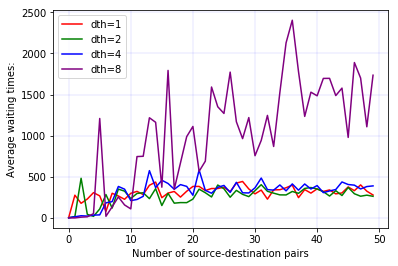

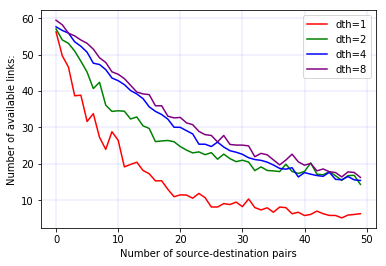

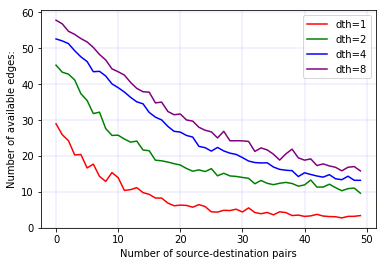

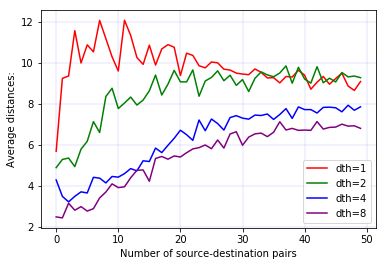

In [5]:
plot_results(initial_knowledge_results, 'initial_knowledge_maxdth_' + str(max_dth) + str(end-start),
                  save_tikz = False)